In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv("car.csv")
df

,c1,c2,c3,c4,c5,c6,Classification
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.c1 = pd.Categorical(pd.factorize(df.c1)[0])
df.c2 = pd.Categorical(pd.factorize(df.c2)[0])
df.c3 = pd.Categorical(pd.factorize(df.c3)[0])
df.c4 = pd.Categorical(pd.factorize(df.c4)[0])
df.c5 = pd.Categorical(pd.factorize(df.c5)[0])
df.c6 = pd.Categorical(pd.factorize(df.c6)[0])
df.Classification = pd.Categorical(pd.factorize(df.Classification)[0])
X = df.drop(columns=['Classification'])
y = df.Classification

In [4]:
# Data Pre-processing 
# Fill the missing values using any imputation method
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(X)

# Normalize the data
X_normalized = preprocessing.normalize(X, norm='l2')
X = pd.DataFrame(X_normalized)
X

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.707107,0.707107
...,...,...,...,...,...,...
1723,0.522233,0.522233,0.522233,0.348155,0.174078,0.174078
1724,0.500000,0.500000,0.500000,0.333333,0.166667,0.333333
1725,0.507093,0.507093,0.507093,0.338062,0.338062,0.000000
1726,0.500000,0.500000,0.500000,0.333333,0.333333,0.166667


In [5]:
# Feature Selection using Principal component Analysis
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
# prepare transform on dataset
pca.fit(X)
# apply transform to dataset
transformed = pca.transform(X)
X = pd.DataFrame(transformed)
X

,0,1,2,3,4,5
0,2.059167e-17,3.501815e-16,0.114317,9.635827e-18,1.831573e-16,0.788449
1,-1.459418e-16,5.999817e-16,0.535697,-6.172134e-01,-5.345225e-01,0.393770
2,-1.459418e-16,5.999817e-16,0.535697,-6.172134e-01,-5.345225e-01,0.393770
3,-3.491948e-17,5.999817e-16,0.535697,7.715167e-01,-2.672612e-01,0.393770
4,-1.364176e-16,7.034523e-16,0.710239,1.091089e-01,-5.669467e-01,0.230289
...,...,...,...,...,...,...
1723,1.126266e-16,-1.943925e-16,-0.210615,-2.686077e-02,1.395726e-01,-0.146546
1724,8.072876e-17,-1.286022e-16,-0.126552,-1.285861e-01,4.454354e-02,-0.172521
1725,1.362361e-16,-1.736898e-16,-0.201195,2.086562e-01,1.807016e-01,-0.119439
1726,9.923247e-17,-1.286022e-16,-0.126552,1.028689e-01,8.908708e-02,-0.172521


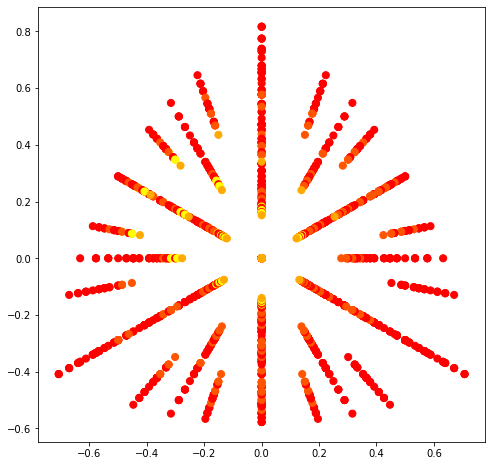

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [7]:
# The data set is not imbalance, hence SMOTE technique is not required.
# Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# train and fit using SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)
p=clf.predict(X_test)

Text(0.5, 0, 'r')

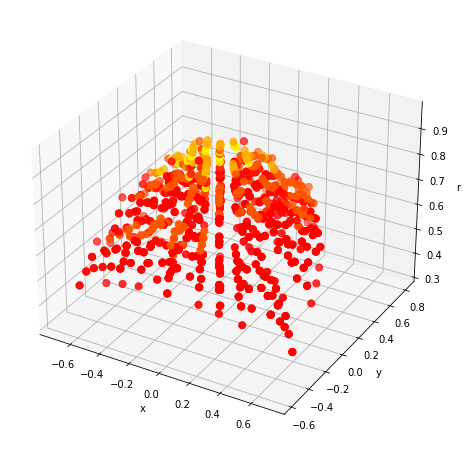

In [8]:
from mpl_toolkits import mplot3d
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,8))
ax = plt.subplot(projection='3d')
ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [9]:
print("--------------------------------------------")
print('Precision Score \t: ', precision_score(y_test, p, average= 'weighted', labels=np.unique(p)))
print('Recall Score \t\t: ', recall_score(y_test, p, average= 'weighted', labels=np.unique(p)))
acc = accuracy_score(y_test, p)
print('Accuracy \t\t: ', acc)
print('Error \t\t\t: ', 1-acc)
print("--------------------------------------------")

--------------------------------------------
Precision Score 	:  0.932080085518915
Recall Score 		:  0.930635838150289
Accuracy 		:  0.930635838150289
Error 			:  0.06936416184971095
--------------------------------------------


In [10]:
df = pd.DataFrame({'Classification':y_test, 'Predicted': p})
df

,Classification,Predicted
189,0,0
364,0,1
973,0,0
351,0,0
781,1,1
...,...,...
548,0,0
838,0,0
999,0,0
259,1,1
